In [4]:
import matplotlib.pyplot as plt
import numpy as np
import src.apps.ionox as ionox

from src.apps.normalized_legendre import normalize_pkm
from src.apps.least_square import least_square
from src.apps.spherical_harmonic import (spherical_triangle_transform,
                                zip_point,
                                # concor_dataset,
                                fit_spherical_harmonic)

# Download

In [2]:
!echo $PYTHONPATH

/mnt/storage-work/liuyihong/github/iono_proj


In [4]:
ionox.download_codg(year=2022,begin=10,end=11)
ionox.unzip_Z(["CODG0100.22i.Z"])

# Read GIM file

In [2]:
data_dir = "./"
filename = data_dir+"CODG%03d0.22I"%(10)

tecarray, _, lonarray, latarray, _ = ionox.read_tec_file(filename)
tec_dataset = tecarray[4][40:55,35:50] # 第18时序，(2.5-52.5N，70-135E)
ydata = tec_dataset.reshape(1,-1)[0]
ydata = np.array(ydata,dtype=np.float64)

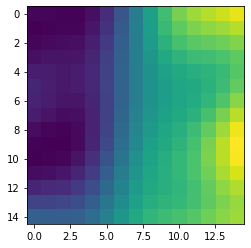

In [3]:
plt.imshow(ydata.reshape(15,15))

In [4]:
lon_dataset = lonarray[35:50]
lat_dataset = latarray[40:55]
beta_c_arr, lam_c_arr = spherical_triangle_transform(lon_dataset,lat_dataset,p_lat=np.radians(10),p_lon=np.radians(10))
point_zip = zip_point(beta_c_arr, lam_c_arr)

xdata_1,answer = fit_spherical_harmonic(point_zip,ydata,steps=5)


In [5]:
new_lon_dataset = np.linspace(-5,65,2000)
new_lat_dataset = np.linspace(-12.5,-47.5,2000)
beta_c_arr, lam_c_arr = spherical_triangle_transform(new_lon_dataset,new_lat_dataset,p_lat=np.radians(10),p_lon=np.radians(10))
point_zip = zip_point(beta_c_arr, lam_c_arr)


# xdata_2 = list()
# for beta_c,lam_c in point_zip:
#     xdata_2.append(concor_dataset(beta_c,lam_c,steps=5))
# xdata_2 = np.array(xdata_2,dtype=np.float64)

In [6]:
import dask
from dask.distributed import Client
client = Client(n_workers=32)

In [7]:
def hhhhh(point_zip):
    xdata_2 = list()
    for beta_c,lam_c in point_zip:
        xdata_2.append(concor_dataset(beta_c,lam_c,steps=5))
    xdata_2 = np.array(xdata_2,dtype=np.float64)
    return xdata_2


new_point_zip = point_zip.reshape(16,-1,2)
task = list()
for i in range (16):
    task.append(dask.delayed(hhhhh)(point_zip=new_point_zip[i]))
data = dask.compute(*task)


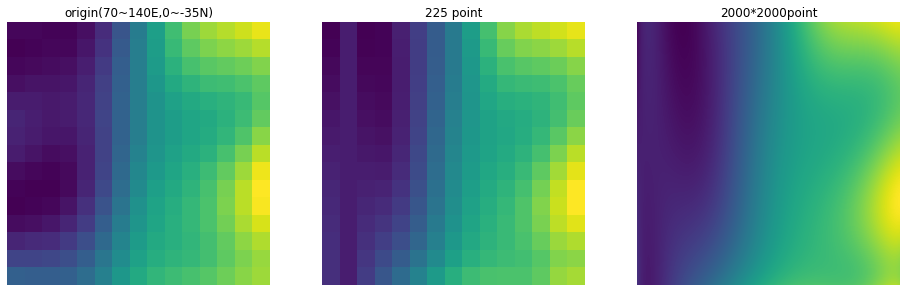

In [65]:
plt.figure(figsize=(16,9))

plt.subplot(131)
plt.title("origin(70~140E,0~-35N)")
plt.axis("off")
plt.imshow(np.array(ydata).reshape(15,15))

plt.subplot(132)
plt.title("225 point")
plt.axis("off")
res_data_1 = np.dot(xdata_1,answer.T)
plt.imshow(res_data_1.reshape(15,15))

plt.subplot(133)
plt.title("2000*2000point")
plt.axis("off")
xdata_2 = np.array(data).reshape(-1,30)
res_data_2 = np.dot(xdata_2,answer.T)
plt.imshow(res_data_2.reshape(2000,2000))

In [3]:
lon_dataset,lat_dataset

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50., 55.,
        60., 65.]),
 array([-12.5, -15. , -17.5, -20. , -22.5, -25. , -27.5, -30. , -32.5,
        -35. , -37.5, -40. , -42.5, -45. , -47.5]))

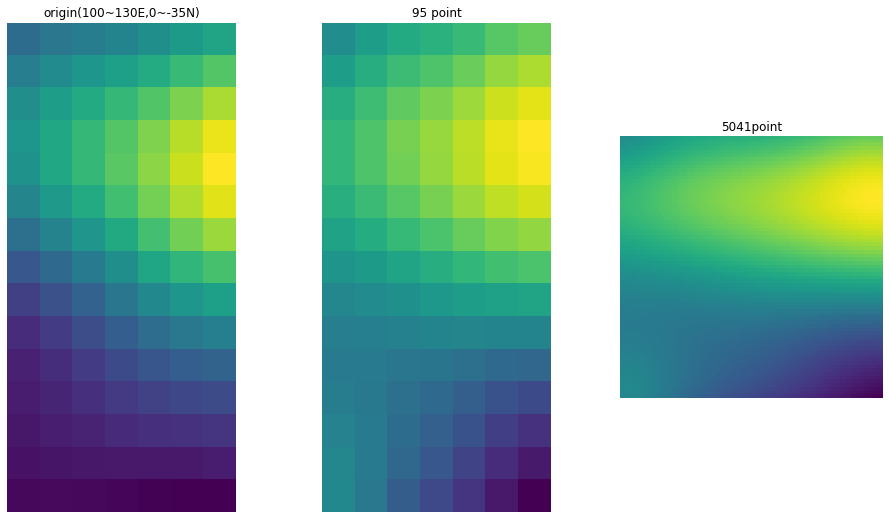

In [17]:
data_dir = "./"
filename = data_dir+"CODG%03d0.22I"%(1)

tecarray, _, lonarray, latarray, _ = ionox.read_tec_file(filename)
tec_dataset = tecarray[4][35:50,56:63] # 第18时序，(2.5-52.5N，70-135E)
ydata = tec_dataset.reshape(1,-1)[0]
ydata = np.array(ydata,dtype=np.float64)

lon_dataset = lonarray[56:63]
lat_dataset = latarray[35:50]
beta_c_arr, lam_c_arr = spherical_triangle_transform(lon_dataset,lat_dataset)
point_zip = zip_point(beta_c_arr, lam_c_arr)

xdata_1,answer = fit_spherical_harmonic(point_zip,ydata,steps=5)

new_lon_dataset = np.linspace(100,130,71)
new_lat_dataset = np.linspace(0,-35,71)
beta_c_arr, lam_c_arr = spherical_triangle_transform(new_lon_dataset,new_lat_dataset)
point_zip = zip_point(beta_c_arr, lam_c_arr)
xdata_2 = list()
for beta_c,lam_c in point_zip:
    xdata_2.append(concor_dataset(beta_c,lam_c,steps=5))
xdata_2 = np.array(xdata_2,dtype=np.float64)

plt.figure(figsize=(16,9))

plt.subplot(131)
plt.title("origin(100~130E,0~-35N)")
plt.axis("off")
plt.imshow(np.array(ydata).reshape(15,7))

plt.subplot(132)
plt.title("95 point")
plt.axis("off")
res_data_1 = np.dot(xdata_1,answer.T)
plt.imshow(res_data_1.reshape(15,7))

plt.subplot(133)
plt.title("5041point")
plt.axis("off")
res_data_2 = np.dot(xdata_2,answer.T)
plt.imshow(res_data_2.reshape(71,71))

In [16]:
lon_dataset,lat_dataset

(array([100., 105., 110., 115., 120., 125., 130.]),
 array([  0. ,  -2.5,  -5. ,  -7.5, -10. , -12.5, -15. , -17.5, -20. ,
        -22.5, -25. , -27.5, -30. , -32.5, -35. ]))

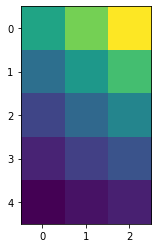

In [51]:
tec_dataset = tecarray[4][43:48,58:61] # 第18时序，(2.5-52.5N，70-135E)
plt.imshow(tec_dataset)

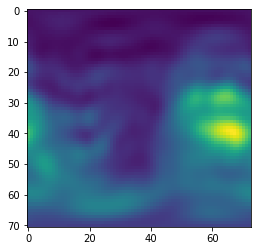

In [41]:
plt.imshow(tecarray[4])

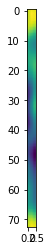

In [42]:
plt.imshow(tecarray[4][58:61].T)

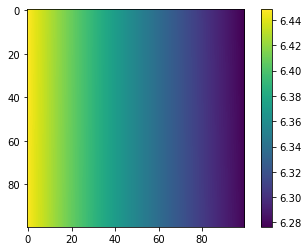

In [7]:
import numpy as np
plt.imshow(np.load("iono_201023.npy").reshape(100,100))
plt.colorbar()